In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
pd.set_option('max_rows', 10)

d = pd.read_csv("../lbfgs_crudo.csv", index_col=0)
d

C:\Users\Alan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,partition,layer_num,neurona_num,activation,alpha,train_accuracy,training_time,test_accuracy
1728,10,1,30,logistic,0.0001,0.927833,23.156492,0.8789
1729,10,1,30,logistic,1.0000,0.950167,21.880265,0.8949
1730,10,1,30,logistic,10000.0000,0.802000,6.253907,0.8065
1731,10,1,30,tanh,0.0001,0.926333,22.267032,0.8854
1732,10,1,30,tanh,1.0000,0.910000,22.207077,0.8725
...,...,...,...,...,...,...,...,...
29563,90,10,210,logistic,1.0000,0.100000,30.609275,0.0974
29564,90,10,210,logistic,10000.0000,0.100000,152.781862,0.0958
29565,90,10,210,tanh,0.0001,0.999741,608.635419,0.9586
29566,90,10,210,tanh,1.0000,0.999667,667.529777,0.9548


In [2]:
####TOMAR EN CUENTA SOLO LOS DATOS QUE TENGAN FUNCION DE ACTIVACION "TNAH"
d_tanh=d.loc[d.activation=='tanh']
####VARIABLE DEPENDIENTE DE INTERES A PRONOSTICAR 
y = d_tanh['test_accuracy']
####VARIABLES INDEPENDIENTES QUE SE USARAN PARA AJUSTAR UNA REGRESION LINEAL MULTIVARIABLE (RLM)
x = d_tanh[['partition','layer_num','neurona_num','alpha']]
x = sm.add_constant(x) # para contar con la b en nuestra f()
####AJUSTANDO LA RLM
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          test_accuracy   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     3052.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:13:44   Log-Likelihood:                 1177.1
No. Observations:                4314   AIC:                            -2344.
Df Residuals:                    4309   BIC:                            -2312.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0498      0.009    112.164      

               test_accuracy     partition     layer_num   neurona_num  \
test_accuracy       1.000000  2.630773e-02 -2.629084e-01  3.299796e-02   
partition           0.026308  1.000000e+00  1.447749e-03  2.172835e-03   
layer_num          -0.262908  1.447749e-03  1.000000e+00 -1.672241e-03   
neurona_num         0.032998  2.172835e-03 -1.672241e-03  1.000000e+00   
alpha              -0.817453 -7.651190e-18 -1.248096e-17  1.195425e-17   

                      alpha  
test_accuracy -8.174529e-01  
partition     -7.651190e-18  
layer_num     -1.248096e-17  
neurona_num    1.195425e-17  
alpha          1.000000e+00  


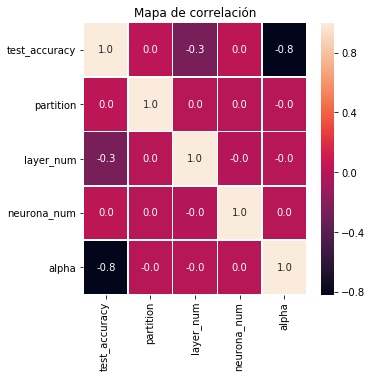

In [3]:
####LAS CORRELACIONES ENTRE LAS VARIABLES INDEPENDIENTES Y DEPENDIENTE 
d_tanh = pd.DataFrame(d_tanh, columns = ['test_accuracy','partition','layer_num','neurona_num','alpha'])
d_tanh = d_tanh.dropna() ###ELIMINA CUALQUIER RENGLON AL CUAL LE HAGA TENGA UNA CELDA VACIA
print(d_tanh.corr())

####MAPA DE CALOR
f,ax=plt.subplots(figsize = (5,5)) ###figsize=(alto de cuadro,ancho de cuadro)
sns.heatmap(d_tanh.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243F13008D0>,
      dtype=object)

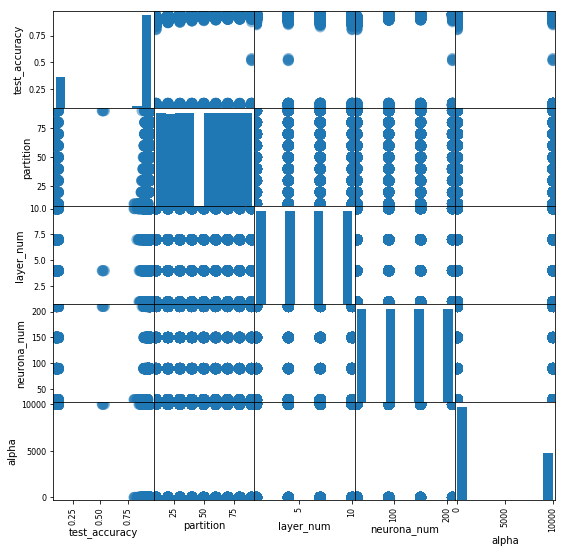

In [4]:
pd.plotting.scatter_matrix(d_tanh, figsize = (9, 9), s = 500)

In [5]:
d_log=d.loc[d.activation=='logistic']
y = d_log['test_accuracy']
x = d_log[['partition','layer_num','neurona_num','alpha']]
x = sm.add_constant(x) # para contar con la b en nuestra f()
m = sm.OLS(y, x).fit() 
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:          test_accuracy   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1626.
Date:                Sun, 24 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:13:50   Log-Likelihood:                 293.03
No. Observations:                4316   AIC:                            -576.1
Df Residuals:                    4311   BIC:                            -544.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7529      0.011     65.541      

               test_accuracy  partition  layer_num  neurona_num     alpha
test_accuracy       1.000000   0.007640  -0.775238     0.011372 -0.012203
partition           0.007640   1.000000   0.001205     0.001447  0.000381
layer_num          -0.775238   0.001205   1.000000    -0.001392 -0.000147
neurona_num         0.011372   0.001447  -0.001392     1.000000 -0.000440
alpha              -0.012203   0.000381  -0.000147    -0.000440  1.000000


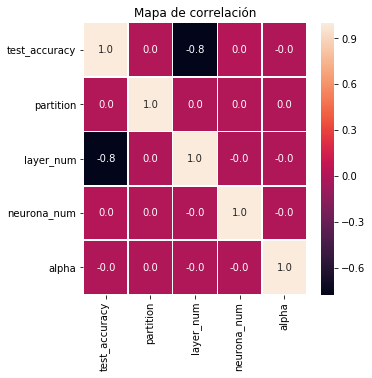

In [6]:
d_log = pd.DataFrame(d_log, columns = ['test_accuracy','partition','layer_num','neurona_num','alpha'])
d_log = d_log.dropna() 
print(d_log.corr())

f,ax=plt.subplots(figsize = (5,5))
sns.heatmap(d_log.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243F8B67A20>,
      dtype=object)

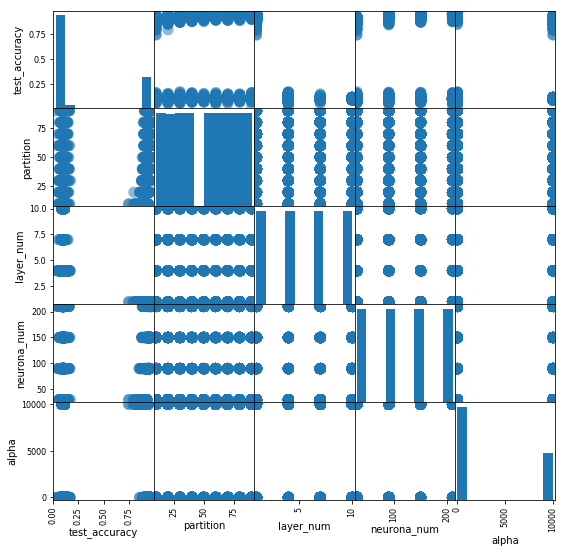

In [9]:
pd.plotting.scatter_matrix(d_log, figsize = (9, 9), s = 500)